In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from tqdm import tqdm

plt.rcParams["figure.figsize"] = (10,10)

In [83]:
TAG_NUM = 256

In [96]:
df_train = pd.read_csv('train.csv')
print("Number of rows in data =",df_train.shape[0])
df_train.head()

Number of rows in data = 51134


,track,tags
0,49734,"5,6,9,26,32,55,96"
1,67845,"6,9,28,39,145,155"
2,25302,"0,6,28,40,116,168"
3,57796,"28,186"
4,13676,"6,23,177"


In [86]:
all_tags = [list(map(int, tags.split(','))) for tags in df_train["tags"]]
all_tags = np.array(sum(all_tags, []))

In [151]:
unique_tags, unique_tags_count = np.unique(all_tags, return_counts=True)
unique_tags_df = pd.DataFrame({"tags": unique_tags, "count": unique_tags_count})
unique_tags_df.head(TAG_NUM)

unique_tags_df.to_csv('tags_count.csv', index=False)

<Axes: ylabel='Count'>

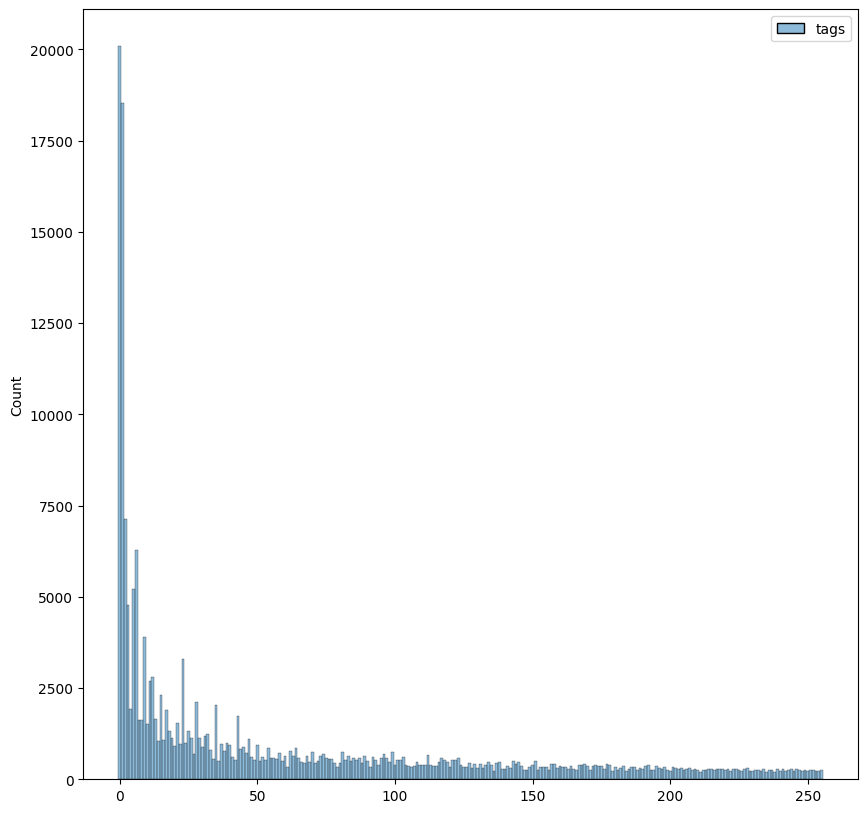

In [109]:
# hist, _, _ = plt.hist(all_tags, bins=list(range(TAG_NUM)))
sns.histplot(pd.DataFrame({"tags": all_tags}), discrete=True)

<Axes: ylabel='Count'>

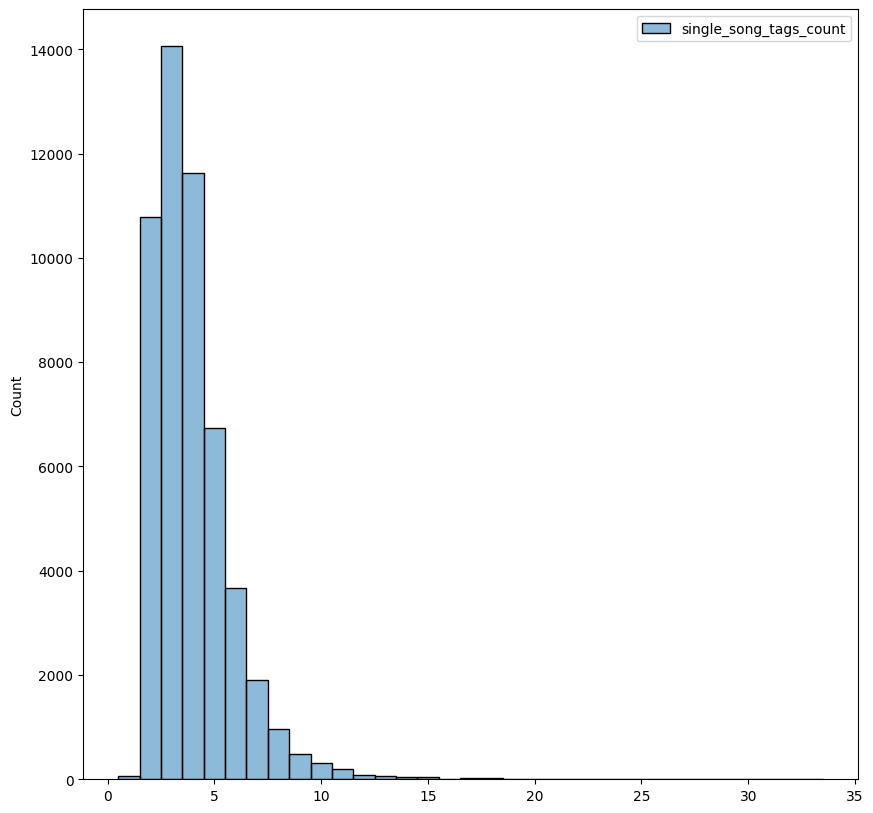

In [107]:
sns.histplot(pd.DataFrame({"single_song_tags_count": df_train.apply(lambda row: len(row["tags"].split(',')), axis=1)}), discrete=True)

<Axes: >

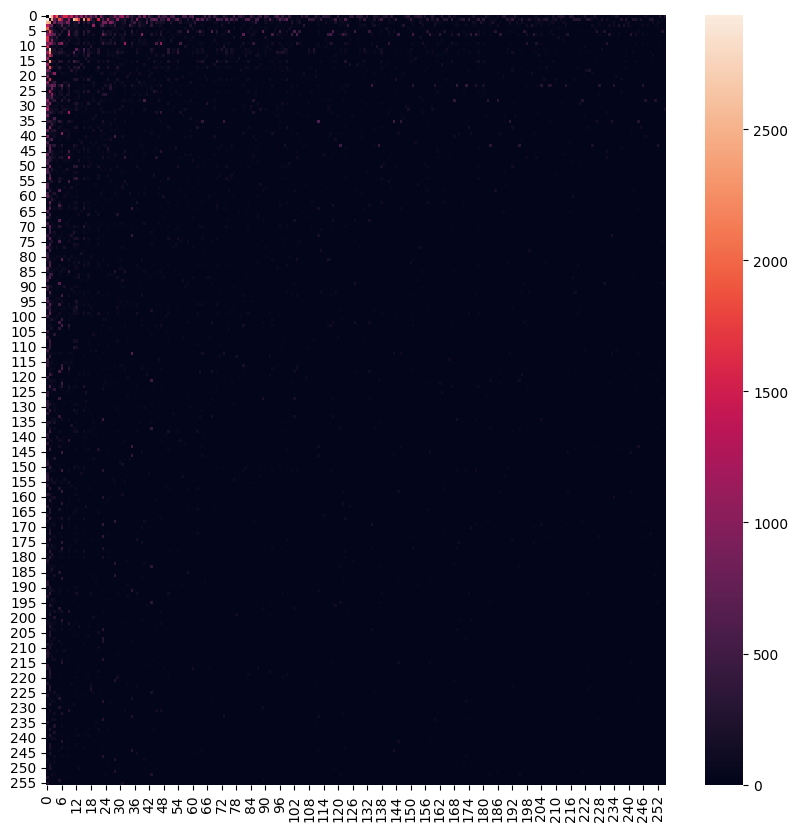

In [131]:
heatmap = np.zeros((TAG_NUM, TAG_NUM))

for i in range(df_train.shape[0]):
    tags = list(map(int, df_train["tags"][i].split(',')))
    # tags = [tag for tag in tags if tag > 50]
    
    for tag_1 in tags:
        for tag_2 in tags:
            heatmap[tag_1,tag_2] += 1

# heatmap = heatmap / heatmap.sum(axis=0)
# heatmap = heatmap / np.diag(heatmap)

# heatmap = heatmap[0:10,0:10]

for i in range(TAG_NUM):
    heatmap[i, i] = 0

sns.heatmap(heatmap)

In [139]:
embeddings = []
for embed_file in tqdm(list(Path("embeddings").iterdir())):
    embeddings.append(np.load(embed_file))

100%|██████████| 76714/76714 [02:55<00:00, 436.78it/s]


In [146]:
shapes = np.array([embedding.shape for embedding in embeddings])

print("Max song size: ", shapes[:,0].max())
print("Min song size: ", shapes[:,0].min())

Max song size:  404
Min song size:  10


<Axes: ylabel='Density'>

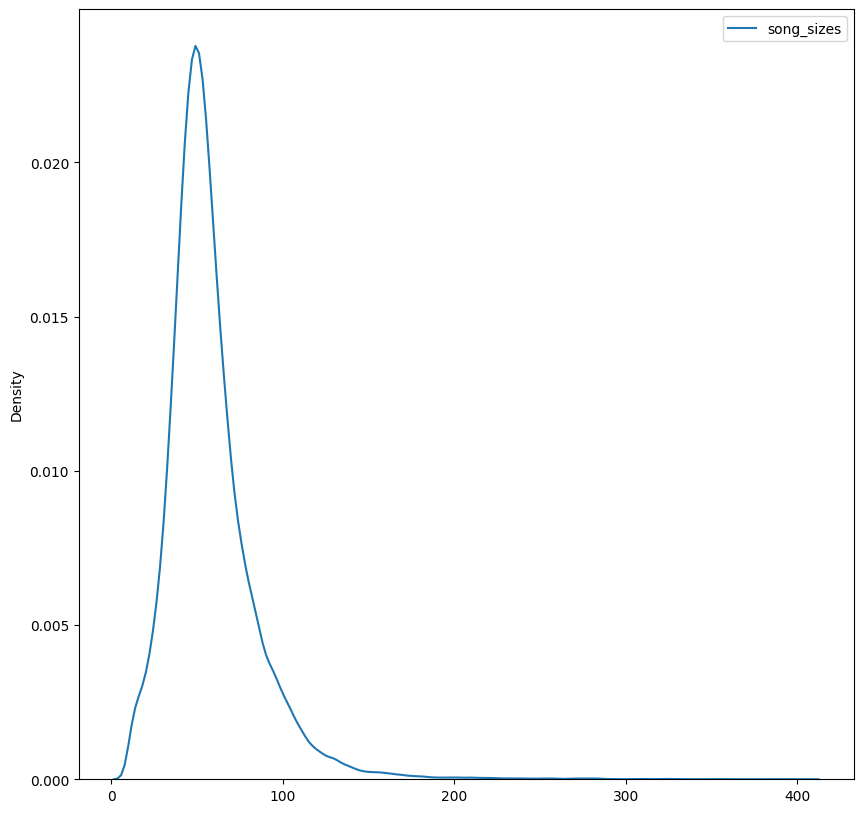

In [150]:
sns.kdeplot(pd.DataFrame({"song_sizes": shapes[:,0]}))

In [145]:
shapes[:,0]

array([114,  48,  70, ..., 112, 105,  52])